### Digit Classification
* Made by modifing an mnist cnn example
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import cv2 as cv
from tensorflow import keras 
from tensorflow.keras import layers 

In [2]:
(X_mnist, Y_mnist),_ = keras.datasets.mnist.load_data()

In [3]:
X_mnist= X_mnist.astype("float32") / 255
X_mnist = np.expand_dims(X_mnist, -1)
Y_mnist = keras.utils.to_categorical(Y_mnist, 10)
        

In [4]:
file=open("/home/seun/Documents/Programme/Python/SudokuSolver/doc/Dataset_Final.dat","rb")
dataset=pickle.load(file)
dataset.insert(0,("Label","Image"))
file.close()

Samplesize:  2857
Format: ('Label', 'Image')
Shape (Data): (28, 28, 3)


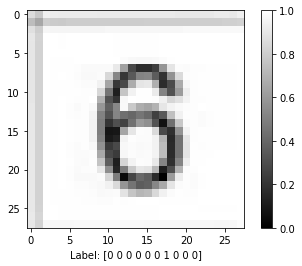

Shape (X_Train): (2570, 28, 28, 1)
Shape (Y_Train): (2570, 10)
Shape (X_Test): (286, 28, 28, 1)
Shape (Y_Test): (286, 10)


In [5]:
print("Samplesize: ",len(dataset))
print("Format:", dataset[0])
print("Shape (Data):",dataset[1][1].shape)
X,Y=[],[]

dist=np.zeros(10)
for e in dataset[1:]:
    X.append(cv.cvtColor(e[1],cv.COLOR_RGB2GRAY)/255)
    y=np.zeros(10,dtype=np.uint8)
    y[int(e[0])]=1
    Y.append(y)
    dist[int(e[0])]+=1


c = list(zip(X, Y))
random.shuffle(c)
X, Y = zip(*c)


i=round(len(X)*0.9)

X_Train,Y_Train,X_Test,Y_Test=np.array(X[:i],dtype=np.float),\
                              np.array(Y[:i],dtype=np.uint8),\
                              np.array(X[i:],dtype=np.float),\
                              np.array(Y[i:],dtype=np.uint8)

X_Train = np.expand_dims(X_Train, -1)
X_Test = np.expand_dims(X_Test, -1)

plt.imshow(X[21],cmap="gray")
plt.xlabel("Label: "+str(Y[21]))
plt.colorbar()
plt.show()
print("Shape (X_Train):", X_Train.shape)
print("Shape (Y_Train):", Y_Train.shape)
print("Shape (X_Test):", X_Test.shape)
print("Shape (Y_Test):", Y_Test.shape)

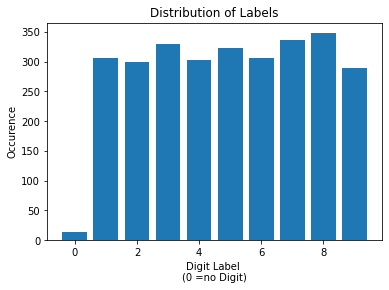

In [6]:
plt.bar(range(10),dist)
plt.title("Distribution of Labels")
plt.xlabel("Digit Label \n(0 =no Digit)")
plt.ylabel("Occurence")
plt.show()


In [7]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [8]:
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("pretrain with mnist")
model.fit(X_mnist, Y_mnist, batch_size=batch_size, epochs=15, validation_split=0.1)

print("tranfertraining printed digits")
history=model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=30, validation_split=0.1)

pretrain with mnist
Epoch 1/15
422/422 [==============================] - 32s 76ms/step - loss: 0.3758 - accuracy: 0.8876 - val_loss: 0.0837 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 35s 83ms/step - loss: 0.1164 - accuracy: 0.9648 - val_loss: 0.0587 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 33s 79ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0468 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 31s 72ms/step - loss: 0.0701 - accuracy: 0.9782 - val_loss: 0.0417 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 31s 72ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 31s 72ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.

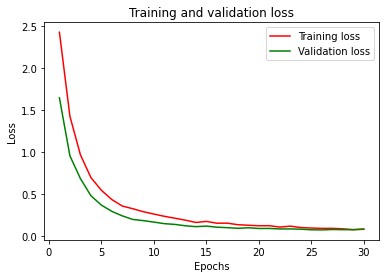

In [9]:
model.save("DigitClassifier.keras")
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAEWCAYAAABrDZDcAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/d3fzzAAAACXBIWXMAAAsTAAALEwEAmpwYAAAz+ElEQVR4nO3deXxU9dX48c/JQkJ2EsIaZF8UySKbggu4VcSKu6I/Ea0bVXGpovVplWrb53ksbSmuxb0+WtwqatW6AaJilUVAVgUMZScEyEISsp3fH/cmmYQsk2VmmMx5v173NXfufO+dczMwZ+793u+5oqoYY4wJXWGBDsAYY0xgWSIwxpgQZ4nAGGNCnCUCY4wJcZYIjDEmxFkiMMaYEGeJwLQpEflARK5p67aBJCLZInKmD7arIjLAnX9KRH7tTdsWvM9VIvJRS+NsZLvjRGR7W2/X+F9EoAMwgScihR5PY4DDQIX7/CZVfdnbbanqBF+0be9U9ea22I6I9AF+BCJVtdzd9suA15+hCT2WCAyqGlc1LyLZwPWq+knddiISUfXlYoxpP+zUkGlQ1aG/iNwrIruB50Wkk4j8U0RyROSAO5/msc4iEbnenZ8qIl+IyCy37Y8iMqGFbfuKyGIRKRCRT0TkcRH5vwbi9ibGh0XkS3d7H4lIZ4/XrxaRrSKSKyL/1cjfZ7SI7BaRcI9lF4rIand+lIh8JSIHRWSXiDwmIh0a2NYLIvJbj+f3uOvsFJHr6rSdKCLfiki+iGwTkZkeLy92Hw+KSKGInFT1t/VYf4yILBWRPPdxjLd/m8aIyLHu+gdFZK2InO/x2rkiss7d5g4Rudtd3tn9fA6KyH4R+VxE7HvJz+wPbprSDUgGegM34vybed59fgxQDDzWyPqjgY1AZ+AR4FkRkRa0fQX4BkgBZgJXN/Ke3sR4JXAt0AXoAFR9MR0HPOluv4f7fmnUQ1W/Bg4Bp9fZ7ivufAVwp7s/JwFnAD9vJG7cGM5x4zkLGAjU7Z84BEwBkoCJwDQRucB97VT3MUlV41T1qzrbTgbeA+a4+/Yn4D0RSamzD0f8bZqIORJ4F/jIXe824GURGew2eRbnNGM8cDywwF3+C2A7kAp0Be4HrO6Nn1kiME2pBB5U1cOqWqyquar6pqoWqWoB8DvgtEbW36qqT6tqBfAi0B3nP7zXbUXkGGAk8ICqlqrqF8A7Db2hlzE+r6rfq2ox8BqQ6S6/BPinqi5W1cPAr92/QUP+DkwGEJF44Fx3Gaq6XFX/rarlqpoN/LWeOOpzmRvfGlU9hJP4PPdvkap+p6qVqrrafT9vtgtO4vhBVV9y4/o7sAH4qUebhv42jTkRiAP+x/2MFgD/xP3bAGXAcSKSoKoHVHWFx/LuQG9VLVPVz9UKoPmdJQLTlBxVLal6IiIxIvJX99RJPs6piCTP0yN17K6aUdUidzaumW17APs9lgFsayhgL2Pc7TFf5BFTD89tu1/EuQ29F86v/4tEJAq4CFihqlvdOAa5pz12u3H8HufooCm1YgC21tm/0SKy0D31lQfc7OV2q7a9tc6yrUBPj+cN/W2ajFlVPZOm53YvxkmSW0XkMxE5yV3+B2AT8JGIbBGR+7zbDdOWLBGYptT9dfYLYDAwWlUTqDkV0dDpnrawC0gWkRiPZb0aad+aGHd5btt9z5SGGqvqOpwvvAnUPi0EzimmDcBAN477WxIDzuktT6/gHBH1UtVE4CmP7Tb1a3onzikzT8cAO7yIq6nt9qpzfr96u6q6VFUn4Zw2mo9zpIGqFqjqL1S1H3A+cJeInNHKWEwzWSIwzRWPc879oHu++UFfv6H7C3sZMFNEOri/Jn/ayCqtifEN4DwROdnt2H2Ipv+fvALcjpNwXq8TRz5QKCJDgGlexvAaMFVEjnMTUd3443GOkEpEZBROAqqSg3Mqq18D234fGCQiV4pIhIhcDhyHcxqnNb7GOXqYISKRIjIO5zOa535mV4lIoqqW4fxNKgFE5DwRGeD2BeXh9Ks0dirO+IAlAtNcs4GOwD7g38C//PS+V+F0uOYCvwVexRnvUJ/ZtDBGVV0L3ILz5b4LOIDTmdmYqnP0C1R1n8fyu3G+pAuAp92YvYnhA3cfFuCcNllQp8nPgYdEpAB4APfXtbtuEU6fyJfulTgn1tl2LnAezlFTLjADOK9O3M2mqqU4X/wTcP7uTwBTVHWD2+RqINs9RXYzzucJTmf4J0Ah8BXwhKoubE0spvnE+mVMMBKRV4ENqurzIxJj2js7IjBBQURGikh/EQlzL6+chHOu2RjTSjay2ASLbsA/cDputwPTVPXbwIZkTPtgp4aMMSbE2akhY4wJcUF3aqhz587ap0+fQIdhjDFBZfny5ftUNbW+13yWCESkF/A3nHICCsxV1b/UaTMOeBunbC7AP1T1oca226dPH5YtW9bm8RpjTHsmInVHlFfz5RFBOfALVV3h1mBZLiIfuyMxPX2uquf5MA5jjDGN8Fkfgaruqios5Rb+Wk/teibGGGOOAn7pLBbnrklZOMPQ6zpJRFaJc9vCoQ2sf6OILBORZTk5Ob4M1RhjQo7PO4tFJA54E7hDVfPrvLwCp/xsoYicizNAaGDdbajqXGAuwIgRI+x6V2P8rKysjO3bt1NSUtJ0YxNQ0dHRpKWlERkZ6fU6Pk0E7s0q3gReVtV/1H3dMzGo6vsi8oSIdG5t3RNjTNvavn078fHx9OnTh4bvK2QCTVXJzc1l+/bt9O3b1+v1fHZqyK0m+CywXlX/1ECbblV3oHKrKIbReO13Y0wAlJSUkJKSYkngKCcipKSkNPvIzZdHBGNxKg5+JyIr3WX349ZWV9WncO4GNU1EynHKBl9hdycy5uhkSSA4tORz8lkicG8n2GhEqvoYjd/vtu2sWQOvvAIzZkBSkl/e0hhjgkHolJjYvBn++79h06ZAR2KMaabc3FwyMzPJzMykW7du9OzZs/p5aWlpo+suW7aM6dOnN/keY8aMaZNYFy1axHnnBdfQqKArMdFiVWUpsrNhxIhARmKMaaaUlBRWrlwJwMyZM4mLi+Puu++ufr28vJyIiPq/zkaMGMEIL/7PL1mypE1iDUahc0TQ271Na3Z2QMMwxrSNqVOncvPNNzN69GhmzJjBN998w0knnURWVhZjxoxh48aNQO1f6DNnzuS6665j3Lhx9OvXjzlz5lRvLy4urrr9uHHjuOSSSxgyZAhXXXUVVV2X77//PkOGDGH48OFMnz69yV/++/fv54ILLiA9PZ0TTzyR1atXA/DZZ59VH9FkZWVRUFDArl27OPXUU8nMzOT444/n888/b/O/WUNC54ggKcmZLBEY0zp33AHur/M2k5kJs2c3e7Xt27ezZMkSwsPDyc/P5/PPPyciIoJPPvmE+++/nzfffPOIdTZs2MDChQspKChg8ODBTJs27Yhr7r/99lvWrl1Ljx49GDt2LF9++SUjRozgpptuYvHixfTt25fJkyc3Gd+DDz5IVlYW8+fPZ8GCBUyZMoWVK1cya9YsHn/8ccaOHUthYSHR0dHMnTuXn/zkJ/zXf/0XFRUVFBUVNfvv0VKhkwjAOT1kicCYduPSSy8lPDwcgLy8PK655hp++OEHRISysrJ615k4cSJRUVFERUXRpUsX9uzZQ1paWq02o0aNql6WmZlJdnY2cXFx9OvXr/r6/MmTJzN37txG4/viiy+qk9Hpp59Obm4u+fn5jB07lrvuuourrrqKiy66iLS0NEaOHMl1111HWVkZF1xwAZmZma350zRL6CWCH34IdBTGBLcW/HL3ldjY2Or5X//614wfP5633nqL7Oxsxo0bV+86UVFR1fPh4eGUl5e3qE1r3HfffUycOJH333+fsWPH8uGHH3LqqaeyePFi3nvvPaZOncpdd93FlClT2vR9GxI6fQRQc0RgQxWMaXfy8vLo2dOpa/nCCy+0+fYHDx7Mli1byHbPKrz66qtNrnPKKafw8ssvA07fQ+fOnUlISGDz5s0MGzaMe++9l5EjR7Jhwwa2bt1K165dueGGG7j++utZsWJFm+9DQ0IvERw6BLk2eNmY9mbGjBn88pe/JCsrq81/wQN07NiRJ554gnPOOYfhw4cTHx9PYmJio+vMnDmT5cuXk56ezn333ceLL74IwOzZszn++ONJT08nMjKSCRMmsGjRIjIyMsjKyuLVV1/l9ttvb/N9aEjQ3bN4xIgR2uIb07z9NlxwASxdapeQGtMM69ev59hjjw10GAFXWFhIXFwcqsott9zCwIEDufPOOwMd1hHq+7xEZLmq1vvFF3pHBGAdxsaYFnn66afJzMxk6NCh5OXlcdNNNwU6pDYRWp3FNpbAGNMKd95551F5BNBaoXVEYGMJjDHmCKGVCMDGEhhjTB2WCIwxJsSFbiIIsquljDHGV0IzEdhYAmOCyvjx4/nwww9rLZs9ezbTpk1rcJ1x48ZRdan5ueeey8GDB49oM3PmTGbNmtXoe8+fP59169ZVP3/ggQf45JNPmhF9/Y6mctWhmQjATg8ZE0QmT57MvHnzai2bN2+eV4XfwKkamtTCG1LVTQQPPfQQZ555Zou2dbSyRGCMOepdcsklvPfee9U3ocnOzmbnzp2ccsopTJs2jREjRjB06FAefPDBetfv06cP+/btA+B3v/sdgwYN4uSTT64uVQ3OGIGRI0eSkZHBxRdfTFFREUuWLOGdd97hnnvuITMzk82bNzN16lTeeOMNAD799FOysrIYNmwY1113HYcPH65+vwcffJATTjiBYcOGsWHDhkb3L9DlqkNrHAHYWAJjWumOf93Byt0r23Sbmd0ymX3O7AZfT05OZtSoUXzwwQdMmjSJefPmcdlllyEi/O53vyM5OZmKigrOOOMMVq9eTXp6er3bWb58OfPmzWPlypWUl5dzwgknMHz4cAAuuugibrjhBgB+9atf8eyzz3Lbbbdx/vnnc95553HJJZfU2lZJSQlTp07l008/ZdCgQUyZMoUnn3ySO+64A4DOnTuzYsUKnnjiCWbNmsUzzzzT4P4Fulx16B0R2FgCY4KS5+khz9NCr732GieccAJZWVmsXbu21mmcuj7//HMuvPBCYmJiSEhI4Pzzz69+bc2aNZxyyikMGzaMl19+mbVr1zYaz8aNG+nbty+DBg0C4JprrmHx4sXVr1900UUADB8+vLpQXUO++OILrr76aqD+ctVz5szh4MGDREREMHLkSJ5//nlmzpzJd999R3x8fKPb9kboHRGAXUJqTCs09svdlyZNmsSdd97JihUrKCoqYvjw4fz444/MmjWLpUuX0qlTJ6ZOnUpJSUmLtj916lTmz59PRkYGL7zwAosWLWpVvFWlrFtTxtpf5apD74gALBEYE4Ti4uIYP3481113XfXRQH5+PrGxsSQmJrJnzx4++OCDRrdx6qmnMn/+fIqLiykoKODdd9+tfq2goIDu3btTVlZWXToaID4+noKCgiO2NXjwYLKzs9m0aRMAL730EqeddlqL9i3Q5apD94jg44+dsQQigY7GGOOlyZMnc+GFF1afIqoq2zxkyBB69erF2LFjG13/hBNO4PLLLycjI4MuXbowcuTI6tcefvhhRo8eTWpqKqNHj67+8r/iiiu44YYbmDNnTnUnMUB0dDTPP/88l156KeXl5YwcOZKbb765RftVdS/l9PR0YmJiapWrXrhwIWFhYQwdOpQJEyYwb948/vCHPxAZGUlcXBx/+9vfWvSenkKrDHWVv/zFue9qTg507twmcRnTnlkZ6uBiZai9YVcOGWNMtdBMBDaWwBhjqlkiMMZ4JdhOI4eqlnxOoZkIkpIgMdESgTFeio6OJjc315LBUU5Vyc3NJTo6ulnrheZVQ2CXkBrTDGlpaWzfvp2cnJxAh2KaEB0dTVpaWrPWCe1E4F7/a4xpXGRkJH379g10GMZHQvPUENh9CYwxxhXaieDQIdi/P9CRGGNMQIV2IgDrJzDGhDyfJQIR6SUiC0VknYisFZHb62kjIjJHRDaJyGoROcFX8RzBEoExxgC+7SwuB36hqitEJB5YLiIfq6pnjdgJwEB3Gg086T76niUCY4wBfHhEoKq7VHWFO18ArAd61mk2CfibOv4NJIlId1/FVIuNJTDGGMBPfQQi0gfIAr6u81JPYJvH8+0cmSwQkRtFZJmILGvT65htLIExxvg+EYhIHPAmcIeq5rdkG6o6V1VHqOqI1NTUtgvOEoExxvg2EYhIJE4SeFlV/1FPkx1AL4/nae4y/7CxBMYY49OrhgR4Flivqn9qoNk7wBT36qETgTxV3eWrmI7Qpw8UFtpYAmNMSPPlVUNjgauB70RkpbvsfuAYAFV9CngfOBfYBBQB1/owniN5XjmUkuLXtzbGmKOFzxKBqn4BNHofSHVKGd7iqxia5JkIhg8PWBjGGBNIoTuyGGwsgTHGEOqJwMYSGGNMiCcCsEtIjTEhzxKBJQJjTIizRGBjCYwxIc4SgY0lMMaEOEsEduWQMSbEWSLo3dt5tERgjAlRlgjsiMAYE+IsESQlQUKCJQJjTMiyRCBil5AaY0KaJQKwRGCMCWmWCMDGEhhjQpolArCxBMaYkGaJAOzKIWNMSLNEAJYIjDEhzRIBWCIwxoQ0SwRgYwmMMSHNEgHYWAJjTEizRFDFEoExJkRZIqjSpw9s3WpjCYwxIccSQZU+faCgAA4cCHQkxhjjVyGVCFQVbegXv105ZIwJUSGTCOZvmE/qH1LZlr+t/gaWCIwxISpkEkFqTCq5xbms3rO6/gaWCIwxISpkEsGwrsMAGk4ENpbAGBOiQiYRJEQl0DepL6v2rKq/gY0lMMaEqJBJBADpXdMbPiIASwTGmJAUUokgo2sG3+d+T3FZcf0N7L4ExpgQFFKJIL1rOpVaybqcdfU3sLEExpgQFHKJAGi4n8CuHDLGhKCQSgT9k/sTExljl5AaY4yHkEoEYRLGsC7DGk4EvXs7j5YIjDEhxGeJQESeE5G9IrKmgdfHiUieiKx0pwd8FYun9K7prNqzqv5SE506QXy8JQJjTEjx5RHBC8A5TbT5XFUz3ekhH8ZSLaNrBvuL97OzYOeRL9pYAmNMCPJZIlDVxcB+X22/pao6jBvtJ7BEYIwJIYHuIzhJRFaJyAciMrShRiJyo4gsE5FlOTk5rXrDqlITjV45ZGMJjDEhJJCJYAXQW1UzgEeB+Q01VNW5qjpCVUekpqa26k2TopPondi78SMCG0tgjAkhAUsEqpqvqoXu/PtApIh09sd7N1pqwi4hNcaEmIAlAhHpJiLizo9yY8n1x3und01nw74NlJSXHPmiJQJjTIiJ8NWGReTvwDigs4hsBx4EIgFU9SngEmCaiJQDxcAV2uDtw9pWRtcMKrSC9TnryeqeVftFSwTGmBDjs0SgqpObeP0x4DFfvX9jPK8cOiIR2FgCY0yICfRVQwExIHkAHSM61n/lkAgMGgSrGylXbYwx7UhIJoLwsHCO73J8wx3GZ5wBS5ZAYaF/AzPGmAAIyUQATZSaOPtsKCuDzz7zf2DGGONnIZ0I9hXtY3fh7iNfHDsWoqPho4/8H5gxxvhZyCaCjK4ZQAOlJqKj4bTT4OOP/RyVMcb4X8gmgqpSEw32E5x9NqxfD9u2+TEqY4zxv5BNBMkdk0lLSGu45tDZZzuPdlRgjGnnvEoEIhIrImHu/CAROV9EIn0bmu9ldM1o+Ihg6FDo3t36CYwx7Z63RwSLgWgR6Ql8BFyNc7+BoJbeNZ31+9ZTWlF65IsicNZZzhFBRYX/gzPGGD/xNhGIqhYBFwFPqOqlQINlo4NFetd0yivLWZ+zvv4GZ58N+/fDt9/6NzBjjPEjrxOBiJwEXAW85y4L901I/tPolUMAZ57pPNrpIWNMO+ZtIrgD+CXwlqquFZF+wEKfReUnA1MGEhUe1XAi6NoVMjOtw9gY0655VXROVT8DPgNwO433qep0XwbmDxFhEQztMrThK4fAOT305z875Sbi4vwXnDHG+Im3Vw29IiIJIhILrAHWicg9vg3NPxq9cgis3IQxpt3z9tTQcaqaD1wAfAD0xblyKOild01nz6E97CncU38DKzdhjGnnvE0Eke64gQuAd1S1DGgXd3f3vDdBvarKTVgiMMa0U94mgr8C2UAssFhEegP5vgrKn5pMBOCcHtqwwcpNGGPaJa8SgarOUdWeqnquOrYC430cm190julMj/gerN7bRCIAu3rIGNMuedtZnCgifxKRZe70R5yjg3YhvWt640cEVm7CGNOOeXtq6DmgALjMnfKB530VlL9ldM1gXc46yirK6m9g5SaMMe2Yt4mgv6o+qKpb3Ok3QD9fBuZP6V3TKa0oZWPuxoYbWbkJY0w75W0iKBaRk6ueiMhYoNg3IfmfVx3GVm7CGNNOeZsIbgYeF5FsEckGHgNu8llUfjY4ZTAdwjuwancjI4yryk1YIjDGtDPeXjW0SlUzgHQgXVWzgNN9GpkfRYZHclzqcY1fOQTO6aElS5xyE8YY00406w5lqprvjjAGuMsH8QRMk1cOgZWbMMa0S625VaW0WRRHgYyuGews2Mm+on0NN7JyE8aYdqg1iaBdlJio4lWHsZWbMMa0Q40mAhEpEJH8eqYCoIefYvQLrxIB1JSb+M9//BCVMcb4XqOJQFXjVTWhnileVb26l0Gw6BLbhW5x3Rq/NwFYuQljTLvTmlND7Y5XHcZV5SYsERhj2glLBB7Su6Szdu9ayivLG25k5SaMMe2MJQIPGd0yOFxxmO9zv2+8oZWbMMa0I5YIPHjdYWzlJowx7YjPEoGIPCcie0VkTQOvi4jMEZFNIrJaRE7wVSzeGtJ5CJFhkU0nAis3YYxpR3x5RPACcE4jr08ABrrTjcCTPozFKx3CO3Bs6rFNXzkENeUmCgp8H5gxxviQzxKBqi4G9jfSZBLwN/eOZ/8GkkSku6/i8ZZXVw6BlZswxrQbgewj6Al43gR4u7vsCCJyY9Xd0XJycnwaVHqXdLbnb2d/cWM5jJpyE3YZqTEmyAVFZ7GqzlXVEao6IjU11afvldEtA/Ciw9jKTRhj2olAJoIdQC+P52nusoDy+sohqCk3sWmTj6MyxhjfCWQieAeY4l49dCKQp6q7AhgPAF1ju5Iak8qyncuabnz55RAZCXPm+D4wY4zxEV9ePvp34CtgsIhsF5GficjNInKz2+R9YAuwCXga+LmvYmkOEeH8wefzxro3yDnURH9Ez55w1VXwzDOwr5Hy1cYYcxTz5VVDk1W1u6pGqmqaqj6rqk+p6lPu66qqt6hqf1Udpqpe/AT3j7vH3E1xeTGPL33ci8Z3Q3ExPPGE7wMzxhgfCIrOYn8b0nkIkwZP4rFvHuNQ6aHGGw8dChMnwqOPQlGRfwI0xpg2ZImgATPGziC3OJfnvn3Oi8YznFNDL77o+8CMMaaNWSJowJheYxjbayx//OqPjVcjBTjlFBg9GmbNsoqkxpigY4mgEfeOvZeteVt5fe3rjTcUcY4KtmyBf/zDP8EZY0wbsUTQiImDJnJs52N5ZMkjqDZxi+ZJk2DAAHjkEWiqrTHGHEUsETQiTMK4Z8w9rNy9ko+3NFFKIjzcuYJo2TKrP2SMCSqWCJpw5bAr6RHfg0e+fKTpxlOmQJcuzlGBMcYECUsETYiKiOKO0Xfw6Y+fsnzn8sYbd+wI06fDBx/Ad9/5J0BjjGklSwReuHH4jSREJfCHJX9ouvG0aRAb61xBZIwxQcASgRcSoxOZNmIar697nS0HtjTeODkZrr8eXnkFtm1rvK0xxhwFLBF4afro6USERfDHJX9suvGddzpXDs2e7fO4jDGmtSwReKlHfA+uTr+a51Y+13Qxut69ncqkc+fCwYN+ic8YY1rKEkEz3D3mbkrKS3jsm8eabnzPPVBYCE895fvAjDGmFSwRNEN1MbqlXhSjy8x0blzzl79ASYlf4jPGmJawRNBM9469l/3F+3n222ebbjxjBuzeDf/3f74PzBhjWsgSQTOd1OskTj7mZP741R8pqyhrvPHpp0NWlnMpaWWlfwI0xphmskTQAjPGzOA/ef/h9XVeFqPbuBHefdc/wRljTDNZImiB6mJ0X3pRjO6SS6BPHys7YYw5alkiaIGqYnSr9qxquhhdRAT84hewZAl8+aV/AjTGmGawRNBCV6VfRY/4Hvzvl//bdONrr4WUFLjrLruCyBhz1LFE0EIdwjtw54l3suDHBSzKXtR449hYZ3DZN9/AjTfa/QqMMUcVSwStcMvIW+ib1Jdb3r+F0orSxhtfdBH85jfw0ktWkM4Yc1SxRNAKHSM78uiER1mXs44/f/Xnplf49a/hssvg3nvhn//0fYDGGOMFSwStNHHQRC4cciEPLX6IrQe3Nt5YBJ5/3hlbcOWVsHatf4I0xphGWCJoA7PPmQ3A7f+6venGMTHw9ttOv8H550Nurm+DM8aYJlgiaAPHJB7DzNNm8vbGt3l3oxcDx9LS4K23YMcOZ5xBWRMjlI0xxocsEbSRO068g6GpQ7ntg9soKitqeoUTT4Snn4ZFi5zbWxpjTIBYImgjkeGRPDnxSbbmbeW3i3/r3UpXX+2UoHjqKXjiCd8GaIwxDbBE0IZO6X0KUzOnMmvJLNbnrPdupd//HiZOdI4KFizwbYDGGFMPSwRt7JEzHyGuQxw/f//nTdchAggPd+5vPHiw01+waZPvgzTGGA+WCNpYamwq/3Pm/7AoexEvf/eydyslJDjVSUWcK4ny8nwbpDHGeLBE4APXn3A9o3uO5hcf/YIDxQe8W6lfP3jjDfjhB5g82a4kMsb4jSUCHwiTMJ6c+CT7ivbxqwW/8n7F8ePhscfggw/gpz917nlsjDE+5tNEICLniMhGEdkkIvfV8/pUEckRkZXudL0v4/GnrO5Z3DbqNp5c9iRLdyz1fsWbboJnnoFPPoFx42DPHp/FaIwx4MNEICLhwOPABOA4YLKIHFdP01dVNdOdnvFVPIHw0PiH6BbXjWnvTaOissL7FX/2M2f08fr1cNJJ8P33vgvSGBPyfHlEMArYpKpbVLUUmAdM8uH7HXUSohL480/+zPJdy3lq2VPNW3niRFi4EAoKYMwY+Pe/fROkMSbk+TIR9AS2eTzf7i6r62IRWS0ib4hIr/o2JCI3isgyEVmWk5Pji1h95rKhl3FmvzO5f8H97C7c3byVR42Cr76CpCQ4/XS777ExxicC3Vn8LtBHVdOBj4EX62ukqnNVdYSqjkhNTfVrgK0lIjx+7uOUlJdw5ZtXUnC4oHkbGDDAuc3l0KFwwQXODW6MMaYN+TIR7AA8f+GnucuqqWquqh52nz4DDPdhPAEzKGUQT//0aRZvXcy4F8c1/8igSxfnNNFPfuJ0Jj/wgN3lzBjTZnyZCJYCA0Wkr4h0AK4A3vFsICLdPZ6eD3hZlyH4TMmYwjuT32HDvg2MeXYMP+T+0LwNxMU5HcjXXQcPP+x0KNtYA2NMG/BZIlDVcuBW4EOcL/jXVHWtiDwkIue7zaaLyFoRWQVMB6b6Kp6jwbkDz2XhNQspKC1gzHNj+GbHN83bQGSkc2npAw84N7iZNMnGGhhjWk28qodzFBkxYoQuW7Ys0GG0yg+5P3DOy+ewu3A3r13yGhMHTWz+Rp5+Gm6+2RmR/MQTcNZZbR+oMabdEJHlqjqivtcC3VkckgamDGTJdUsY0nkIk+ZN4tkVzzZ/Izfc4Aw6E4Gzz4YrroCdO9s+WGNMu2eJIEC6xnVl0TWLOLPfmVz/7vU8/NnD3lUr9TR+PKxeDb/5DcyfD0OGwJw5UF7uk5iNMe2TJYIAio+K593J7zIlYwoPLHqAae9No7yymV/i0dFOn8GaNc7As9tvd8YffNPM/gdjTMiyRBBgkeGRvDDpBX558i/56/K/cvFrF3t3q8u6BgxwitW99ppTn+jEE2HaNDjgZfVTY0zIskRwFBARfn/G73l0wqO8u/FdzvjbGWzev7klG4JLL3VqFE2f7gw+GzIEXnrJxh0YYxpkieAocuuoW3n90tdZs3cNQ58YygMLH2jZ0UFCAsyeDcuWQd++MGUKnHIKPPqocwrJkoIxxoMlgqPMxcddzMZbN3LxcRfz8OKHOe7x43h7w9vN70gGyMpyylM89ZRzRdH06TBsGHTr5lxlNHeucyMcSwzGhDQbR3AU+yz7M255/xbW5qxlwoAJzJkwhwHJA1q+wR9/dEpVLFwICxbUXG6aluYUtTv9dOdKpGOOaZsdMMYcNRobR2CJ4ChXVlHGY988xoOLHuRwxWFmjJnBL0/5JTGRMa3bsKpzn4OqpLBwIezb57w2aBCccw5MmACnnQYdO7Z+R4wxAWWJoB3YVbCLez6+h5e/e5neib2Zfc5sJg2ehIi0zRtUVjr9BwsWwIcfwqJFUFLiXJ46fnxNYhg4sG3ezxjjV5YI2pHPsj/j1g9uZc3eNZwz4BxmnTWLoV2Gtv0bFRfDZ585l6T+6181d0nr378mKYwfDzGtPDIxxviFJYJ2pqyijMeXPs4DCx+goLSAs/qdxfTR0zl34LmEiY/6/7dsqUkKCxZAUZFTBC8ry7md5kknOWMXjjnGuYzVGHNUsUTQTu0r2sfTy5/m8aWPs6NgB/079ee2Ubdxbda1JEQl+O6NS0rgiy+cWkdffQVLlzpHEADdu9ckhZNOguHDrY/BmKOAJYJ2rqyijLc2vMVfvv4LS7YtIa5DHNdmXsuto25lUMogPwRQBt995ySFr75y7q+82R0QFxEBmZlOYhg92pkGDLCjBmP8zBJBCFm2cxlzvp7DvDXzKKssY8KACdw++nbO6n+W704b1WfvXvj665rksHQpHDrkvNapk1MPqSoxjB4NKSn+i82YEGSJIATtLtzN3OVzeXLZk+wu3M2glEFcefyVXH785QzpPMT/AVVUwLp1TnKomtauda5WAqcTevRoJ0FkZkJ6upMwjDFtwhJBCCutKOX1ta8zd8VcPt/6OYoyrMswLh96OZcNvYyBKQG8HLSgAJYvr50cPO+p0KsXZGQ4SaHqceBACA8PXMzGBClLBAaAnQU7eXPdm7y69lW+3PYlAFndsrh86OVcOvRS+nXqF+AIcRLB6tXOtGqV87h+vXNEAc64huOPdxJD1ZSeDklJAQ3bmKOdJQJzhG1523hj3Ru8uvZVvt7xNQAje4zksqGXcfIxJ9MroRfd4roRHnYU/Po+fNhJBlWJYdUqZ6oaCQ3Qu3ft5JCR4dzGM8zKaRkDlghME7IPZvP62td5bd1rLNtZ87cNl3B6xPcgLSGNXom9SIt3HxPS6JXQi16JTrLwayd0FVXYvdtJCCtX1iSHjRtr+h3i4pwie1lZTv/DiSc6p5bsiiUTgiwRGK9lH8xm7d61bM/fzrb8bbUf87ZRXF5cq33HiI7069SP/sn9GdBpgPOYPID+nfrTO6k3EWER/t2B4mKnE7oqMaxaBd9+6/RHACQnOwmhapzDyJGQmNj0dlUhPx927XJOXxUWwuDBTid3hJ/30ZgWsERg2oSqcqDkANvynMSwNW8rm/dvZvOBzWzav4ktB7bUShThEk6fpD70T+7PwOSBDEoZxOCUwQxKGcQxicf477RTRQVs2OCMb6ga57BunfPlLgLHHVeTHKKjnS/6qi98z8eieu4N0aEDHHssDB3qTMcf7zz27WunpcxRxRKB8QtVZVfhLjbt38Tm/U5yqEoSP+z/gfzD+dVto8KjGJA8gEEpg2oliP7J/UnpmEJkeKRvg83Lc8Y2VCWGf/8b9u+veT02Fnr0cKbu3Y987NjROQ21dq1TrG/tWvjPf2rWj4mpSRCdOtXc80G14SkqyjnCGDTIOYXVu7cdbZg2Y4nABJyqsvfQXr7P/Z6NuRv5Pvf76vnN+zdTVllWq318h3iSOyYfMaV0TKme7xHfg36d+tE7qTcdwju0NkBnNHRlpfNFHx/f/G3k5ztHGlWJYc0a53lhofO6SMMTOKe1qtqCU8vJMzEMGlQzde1ql9GaZrFEYI5q5ZXlbD24le9zv2fLgS3sL97vTCX7a+Y9pvLK8lrrC0JaQhr9OvWrnvom9a2e7xLbpe3KdfuSKuTkOJVeq6Yffqh5PHy4dvuYGCdhJSQ4U9V83cfYWKfj3POxvmXh4TVHJ1Xx1DdFRlr9qCBkicC0G6pKYWkhucW5bM/fzpYDW2pNPx78kZ0FO2utEx0RTWpMKqmxqXSJ7eLMu8/rPgLkH84n/3A+BYcLauZLa+bzD+dTVllGt9hu9EzoSY/4HvSM71k9Hx0R3fY7XlkJ27bVJIZ9+5wjkIKCxh/rJo+2kprqXJ7bt6/z6Dmfllb/Ka2yMifuvXthz57aj0VFzqmwqm316+ckMdNmLBGYkFJcVkz2wezqxLD14Fb2Fu0l51AOOUU51Y9FZfV0/jYiTMKI7xBPQlQCEWER7C7cfcRVVAApHVNqJYjkjsnEdYirnmIjY2s/71DzPDEqsW37R0pLnRpPhw45p50ae6yoqP+UVd1lJSWQne3c+nTLFqdvpGrAHzhHFr17Q58+zvK9e50pN7f+GKuOMPLzay9PSamdGKqSTWqqcxRTNXXsaJcEe8ESgTH1KCorqk4Kew85iSJMwkiISiAhKoH4qPia+Q7xxETG1DrFpKocLDnIjoId7CzYyY78Hewo2FH9uLNgJzsKdnCw5CAl5SVexxUTGUNSdBJJ0UkkRiU6j9GJJEU5j4lRiVRoRfURS9XRSvWjx/LD5Yfp1LHTkf0t0Uf2v0SGR6KqKNroY5iE1UpkcWHRxOUcJG77XsJ/3FqTILKznSODLl2cPg3PR8/5xETni/zAgZp1605bt0J5ef1/MJHaicHz9FfHjs4UHX3kvOcyzyu8PL8T634/hoU5p+Sqtl/fFBV1VCYmSwTGBFh5ZTlFZUUUlhZSWFrIodJD1fOFpYUcKjtEweEC8g7ncbDkIAdLDtaeL6mZr+pYjwqPqpWwqo5W4qPiSejgPHYI78DBkoP19rXkHc5r8/3sGNGxVpKICIuoTiBAg/MiQmRYJB3CO9Q/hUXQoaScDodKiC2FpIoIEsvCSSoNI7EEkoqVxKIKEgvLSMovJSHvMOGFh5yjl+LimseqqYnvvfIwKI6AokhnKnYfS8MhvBLCFSIqnfmIus8ljPDoGMISk5DkZKRTMpKcgqSkQHIyktIZSUlxp85UxnSk+GAOhw7spSg/l0P5+ygq2M+hQwcoKsqnqDifQyUFFJUWMmr4+Yy/ZVaLPpvGEoFdm2aMH0SERVQfXbSGqlJSXkJ4WHirr5QqryyvlSTKKsoQEQRp9LFSK6sTWUFpQa2EVlhaSMHhAgrLnPmKSueUUdX6Dc1XaiVllWWUVpRSVlFGSXkJ+YfzKa0orTUdrjhMYWlh7dN64UCcO3WpWRwTGUO4hBMeFu7xmEh4WLLzHCGcMMIRSivKKK4ooai8mKKKkiOuYmueSqDQnbbXfkmBfe7kjWh3ct1dtIrxrYisIZYIjAkiIkLHyLa5YiciLILOMZ3pHNO5TbbnT2UVZeQdzqs+Uqo6esoryaueLzhcQIVWUFFZQaVWVs9XaEXt+coKOoR3ICYyhpjIGDpGdKyZj6yZj4mMoUN4h+r1yivLKa8sp6LSma9aVvW8UitrnVYD0PIy9NAh9FAhWliIHjqElJYSG5NITGwnYuOTiUlIITYxlZikVGJjk4iJjCE2MpaYyBjfXIiAJQJjTBCKDI8M2iR2NLIx8MYYE+J8mghE5BwR2Sgim0TkvnpejxKRV93XvxaRPr6MxxhjzJF8lghEJBx4HJgAHAdMFpHj6jT7GXBAVQcAfwb+11fxGGOMqZ8vjwhGAZtUdYuqlgLzgEl12kwCXnTn3wDOkKCoBWCMMe2HLxNBT2Cbx/Pt7rJ626hqOZAHpNTdkIjcKCLLRGRZTk6Oj8I1xpjQFBSdxao6V1VHqOqI1NTUQIdjjDHtii8TwQ6gl8fzNHdZvW1EJAJIBBooSGKMMcYXfJkIlgIDRaSviHQArgDeqdPmHeAad/4SYIEGW80LY4wJcj6tNSQi5wKzcQaBP6eqvxORh4BlqvqOiEQDLwFZwH7gClXd0sQ2c4CtdRZ3xvtB28Ggve0PtL99am/7A+1vn9rb/kDr9qm3qtZ7bj3ois7VR0SWNVRMKRi1t/2B9rdP7W1/oP3tU3vbH/DdPgVFZ7ExxhjfsURgjDEhrr0kgrmBDqCNtbf9gfa3T+1tf6D97VN72x/w0T61iz4CY4wxLddejgiMMca0kCUCY4wJcUGdCJoqcx2MRCRbRL4TkZUiEpQ3ZxaR50Rkr4is8ViWLCIfi8gP7mOnQMbYHA3sz0wR2eF+TivdMTNBQUR6ichCEVknImtF5HZ3eTB/Rg3tU1B+TiISLSLfiMgqd39+4y7v65bs3+SW8G/d/Uqr3i9Y+wjcMtffA2fhFLRbCkxW1XUBDayVRCQbGKGqQTsQRkROxblh699U9Xh32SPAflX9Hzdpd1LVewMZp7ca2J+ZQKGqtuxO4gEkIt2B7qq6QkTigeXABcBUgvczamifLiMIPye3CnOsqhaKSCTwBXA7cBfwD1WdJyJPAatU9cnWvl8wHxF4U+baBICqLsYZKe7Js+T4izj/SYNCA/sTtFR1l6qucOcLgPU4lYCD+TNqaJ+CkjoK3aeR7qTA6Tgl+6ENP6NgTgTelLkORgp8JCLLReTGQAfThrqq6i53fjfQNZDBtJFbRWS1e+ooaE6jeHLvCpgFfE07+Yzq7BME6eckIuEishLYC3wMbAYOuiX7oQ2/84I5EbRXJ6vqCTh3drvFPS3RrriFBYPznGSNJ4H+QCawC/hjQKNpARGJA94E7lDVfM/XgvUzqmefgvZzUtUKVc3Eqdw8Chjiq/cK5kTgTZnroKOqO9zHvcBbOP8A2oM97nncqvO5ewMcT6uo6h73P2ol8DRB9jm5553fBF5W1X+4i4P6M6pvn4L9cwJQ1YPAQuAkIMkt2Q9t+J0XzInAmzLXQUVEYt2OLkQkFjgbWNP4WkHDs+T4NcDbAYyl1aq+MF0XEkSfk9sR+SywXlX/5PFS0H5GDe1TsH5OIpIqIknufEeci2LW4ySES9xmbfYZBe1VQ1B/mevARtQ6ItIP5ygAIAJ4JRj3SUT+DozDKZm7B3gQmA+8BhyDU0b8MlUNig7YBvZnHM7pBgWygZs8zq8f1UTkZOBz4Dug0l18P8459WD9jBrap8kE4eckIuk4ncHhOD/YX1PVh9zviHlAMvAt8P9U9XCr3y+YE4ExxpjWC+ZTQ8YYY9qAJQJjjAlxlgiMMSbEWSIwxpgQZ4nAGGNCnCUCY1wiUuFRpXJlW1a0FZE+ntVLjTmaRDTdxJiQUewO6TcmpNgRgTFNcO8R8Yh7n4hvRGSAu7yPiCxwC5p9KiLHuMu7ishbbi35VSIyxt1UuIg87daX/8gdMYqITHfr6K8WkXkB2k0TwiwRGFOjY51TQ5d7vJanqsOAx3BGswM8CryoqunAy8Acd/kc4DNVzQBOANa6ywcCj6vqUOAgcLG7/D4gy93Ozb7ZNWMaZiOLjXGJSKGqxtWzPBs4XVW3uIXNdqtqiojsw7kZSpm7fJeqdhaRHCDNc+i/Wxr5Y1Ud6D6/F4hU1d+KyL9wbnwzH5jvUYfeGL+wIwJjvKMNzDeHZ02YCmr66CYCj+McPSz1qC5pjF9YIjDGO5d7PH7lzi/BqXoLcBVO0TOAT4FpUH1zkcSGNioiYUAvVV0I3AskAkcclRjjS/bLw5gaHd07QlX5l6pWXULaSURW4/yqn+wuuw14XkTuAXKAa93ltwNzReRnOL/8p+HcFKU+4cD/uclCgDlu/Xlj/Mb6CIxpgttHMEJV9wU6FmN8wU4NGWNMiLMjAmOMCXF2RGCMMSHOEoExxoQ4SwTGGBPiLBEYY0yIs0RgjDEh7v8DvMI+xrMjkgoAAAAASUVORK5CYII=

In [10]:
score = model.evaluate(X_Test, Y_Test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09928132593631744
Test accuracy: 0.9755244851112366


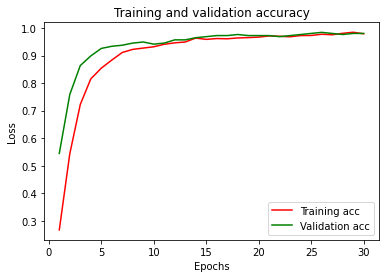

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Label: 8
Layer 0:




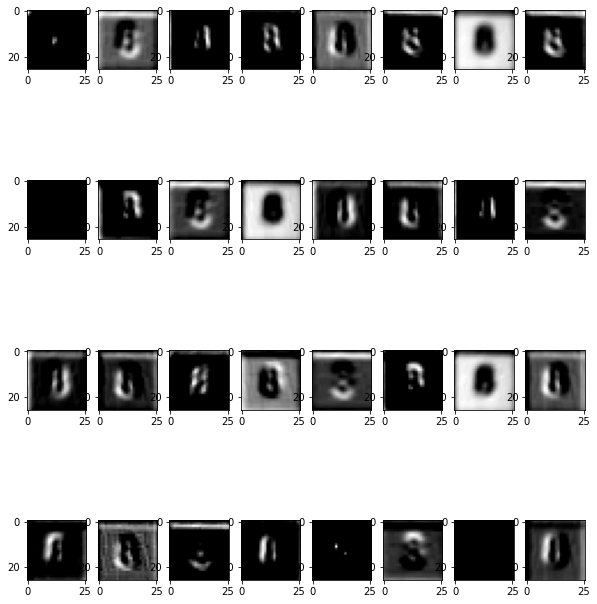

Layer 1:




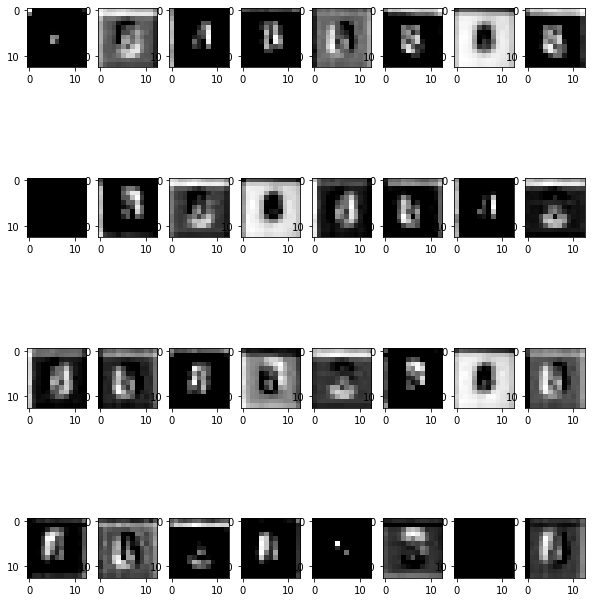

Layer 2:




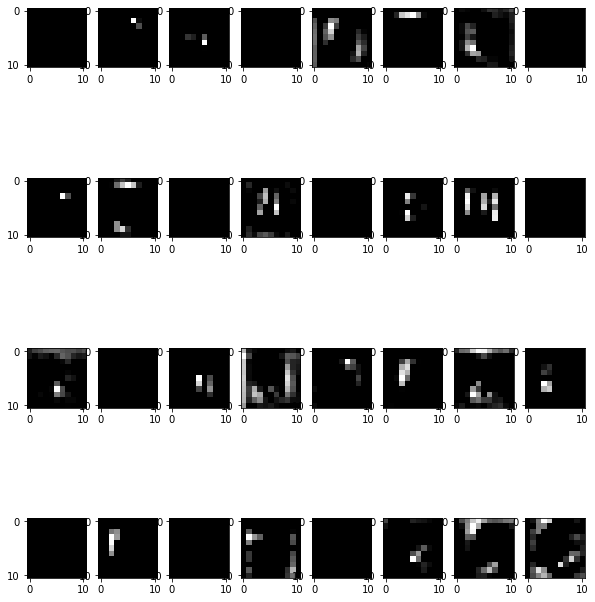


Label: 7
Layer 0:




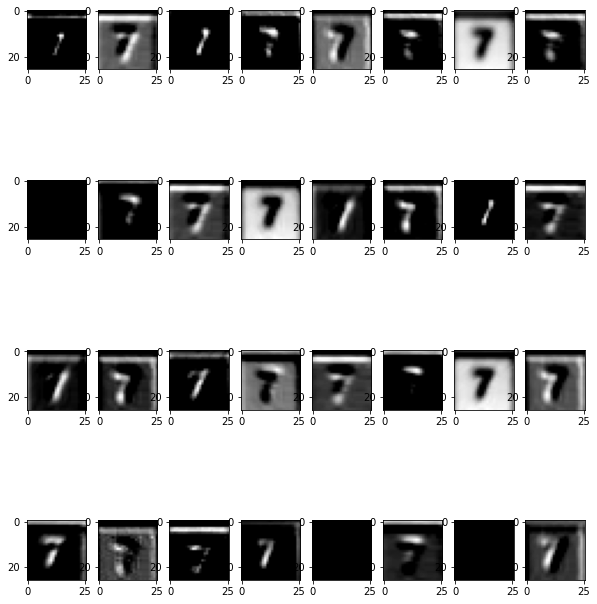

Layer 1:




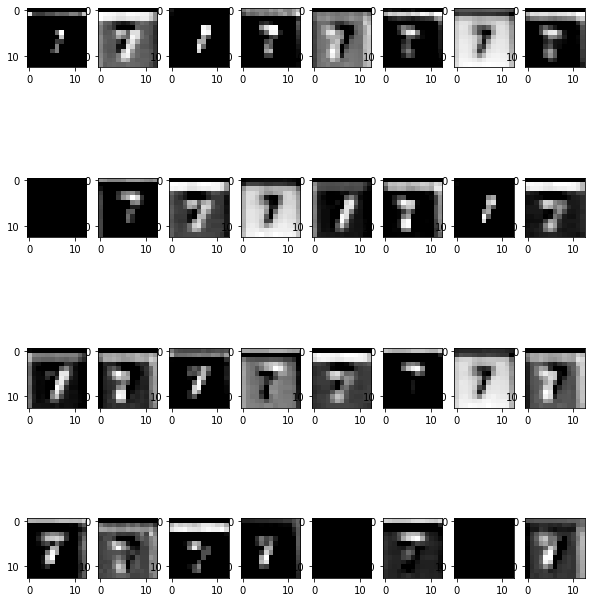

Layer 2:




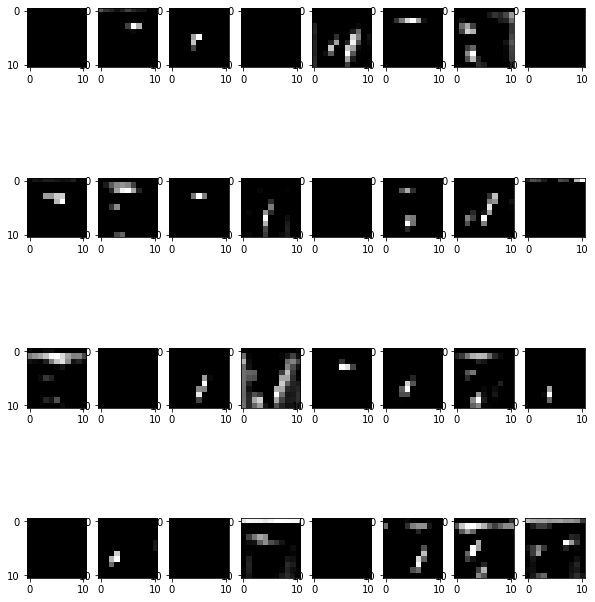


Label: 8
Layer 0:




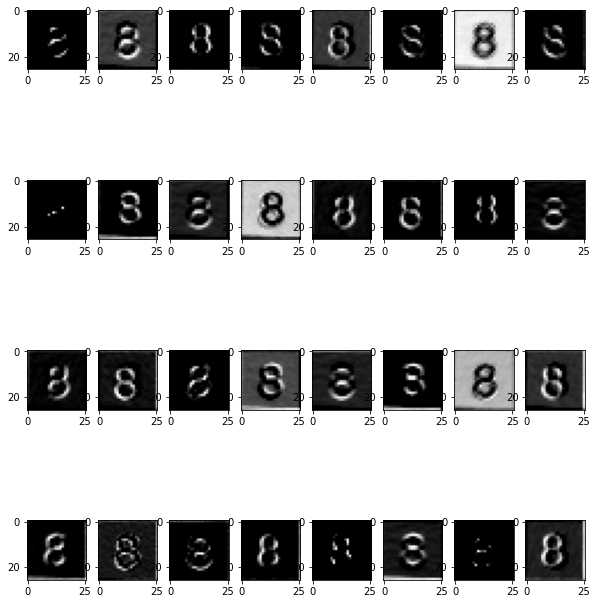

Layer 1:




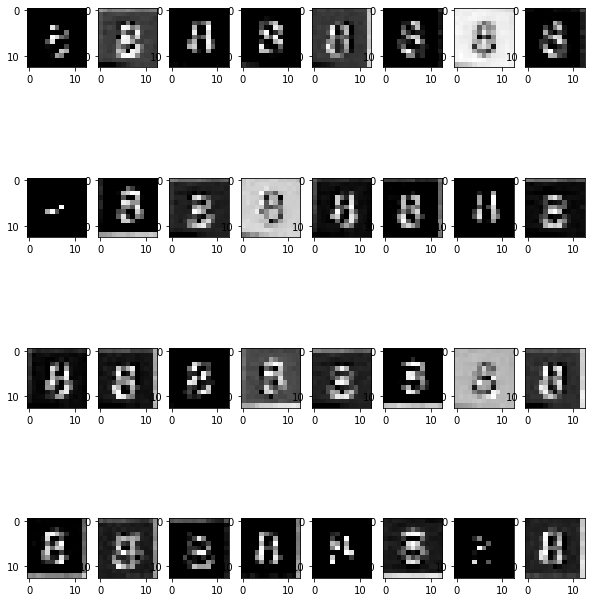

Layer 2:




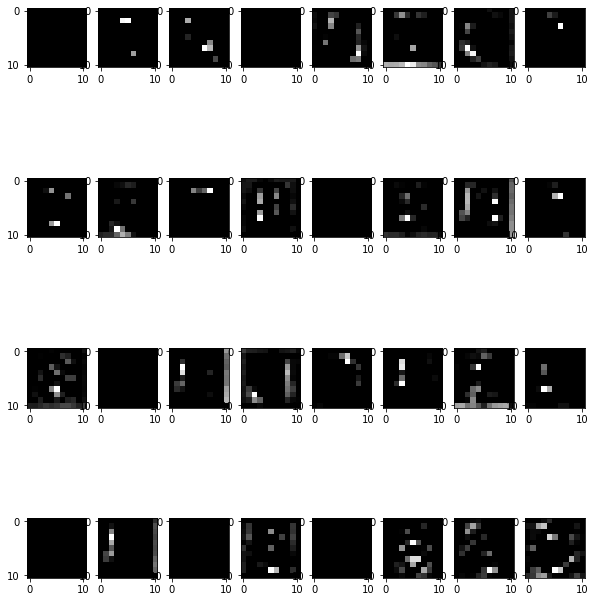


Label: 4
Layer 0:




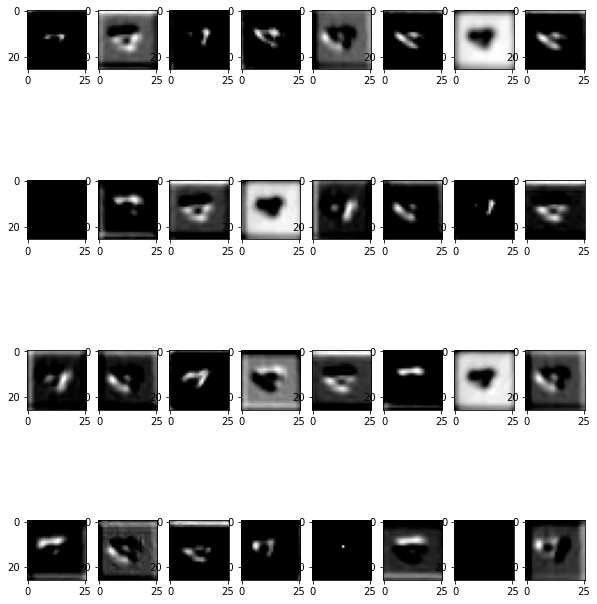

Layer 1:




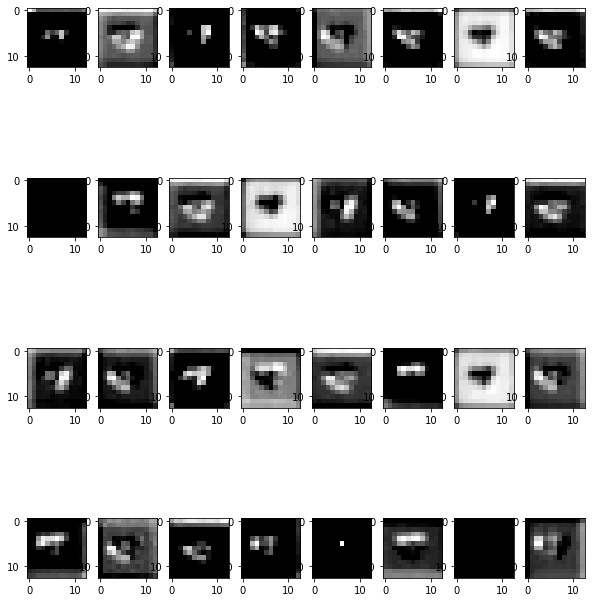

Layer 2:




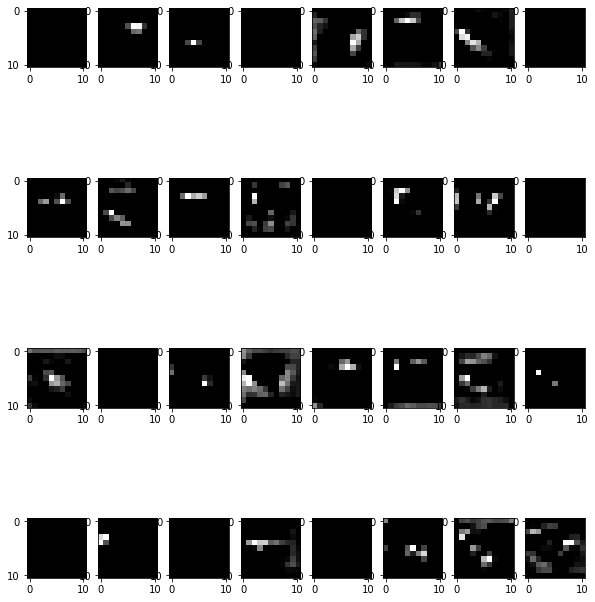


Label: 1
Layer 0:




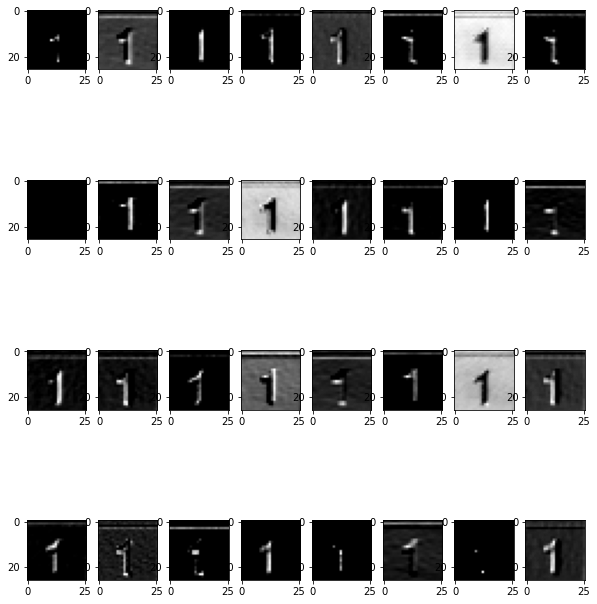

Layer 1:




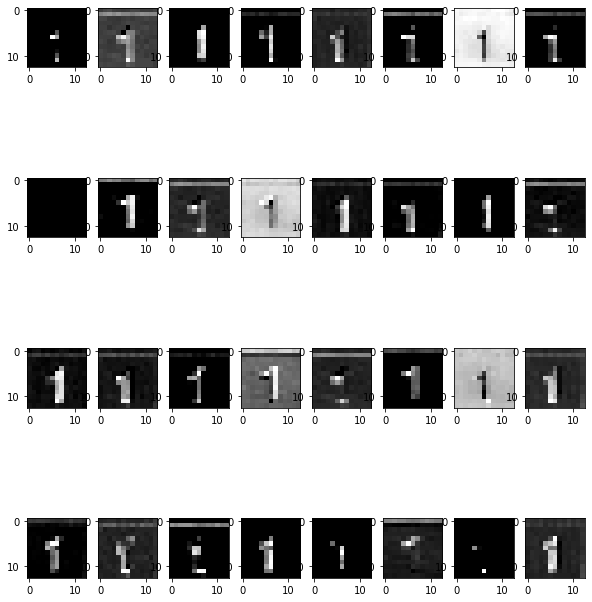

Layer 2:




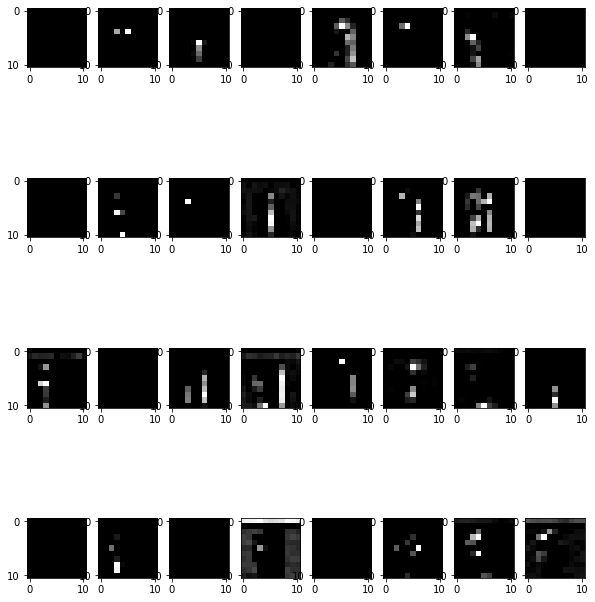


Label: 2
Layer 0:




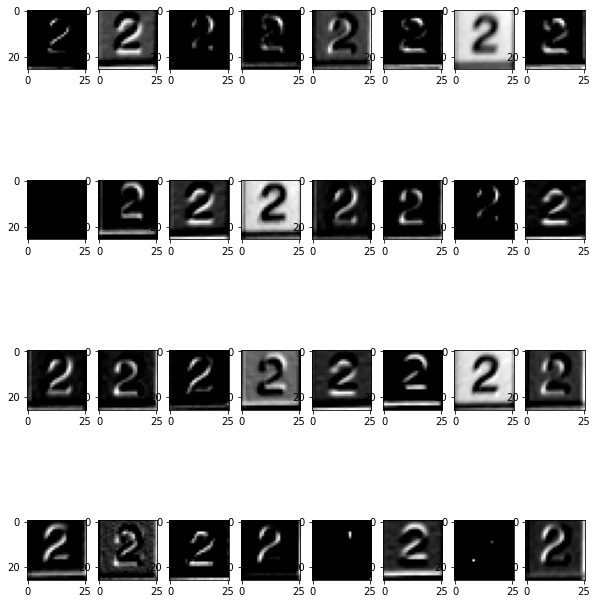

Layer 1:




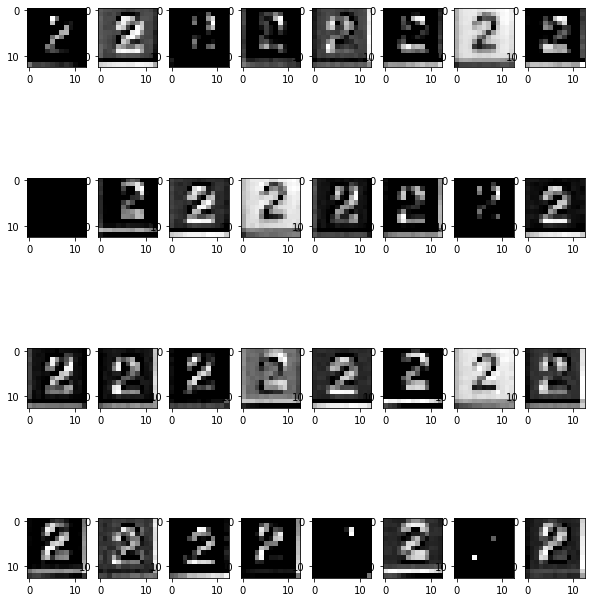

Layer 2:




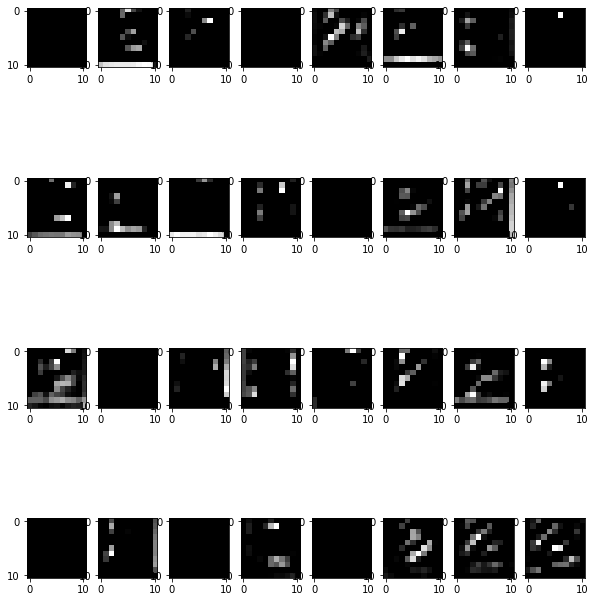


Label: 4
Layer 0:




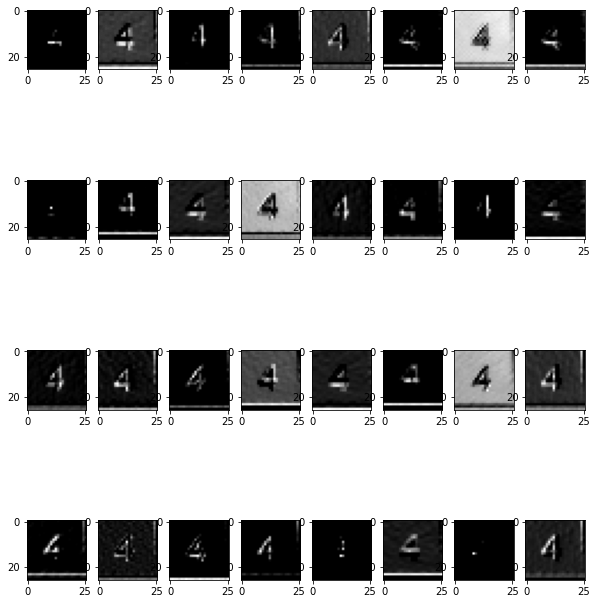

Layer 1:




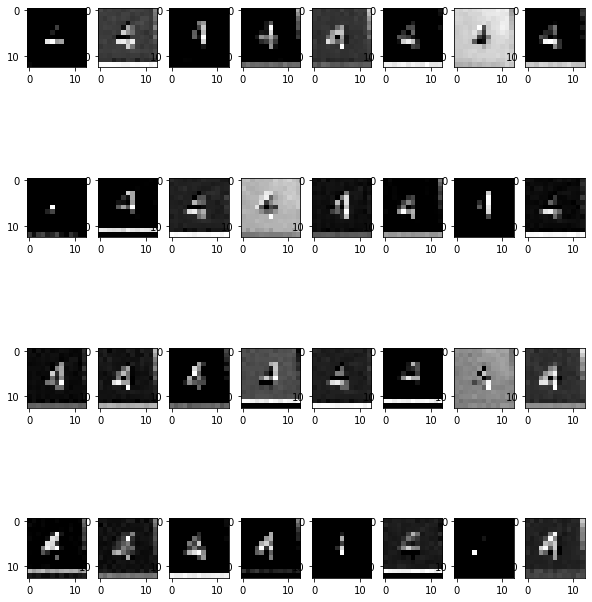

Layer 2:




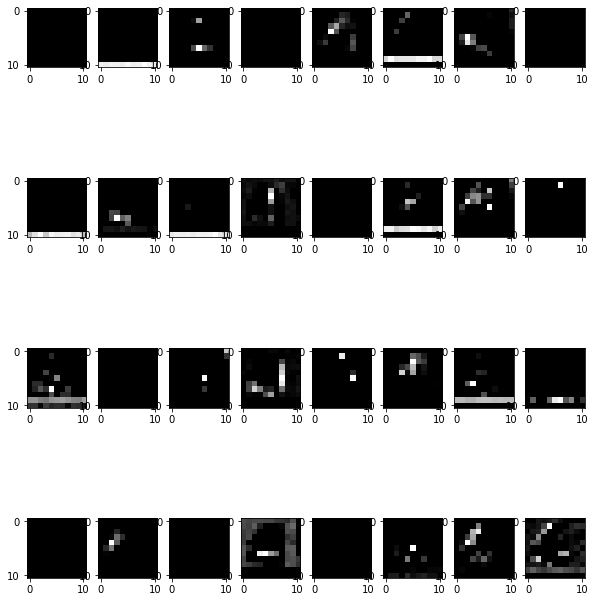


Label: 5
Layer 0:




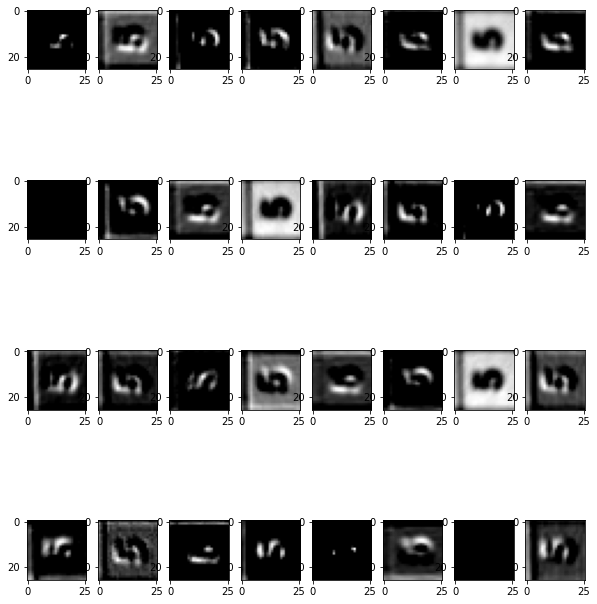

Layer 1:




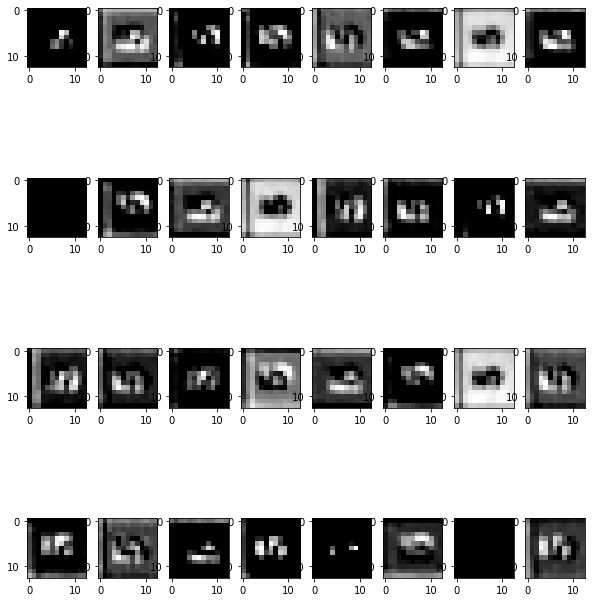

Layer 2:




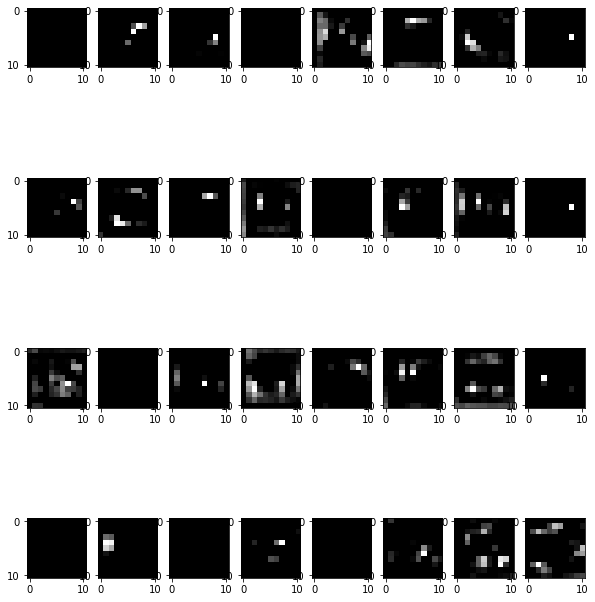


Label: 7
Layer 0:




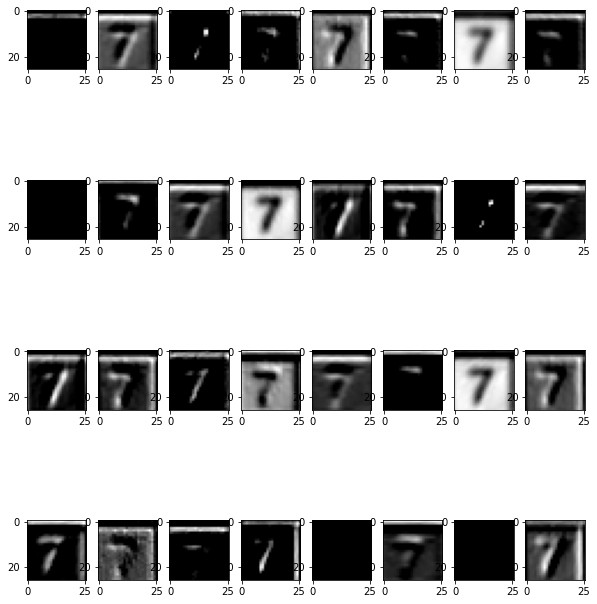

Layer 1:




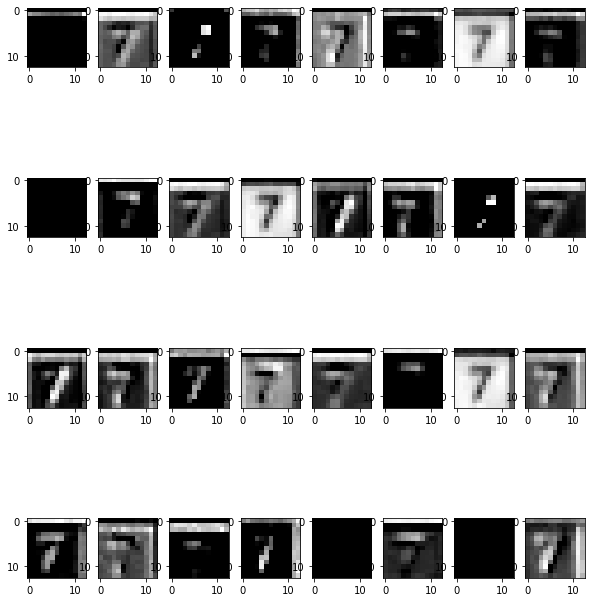

Layer 2:




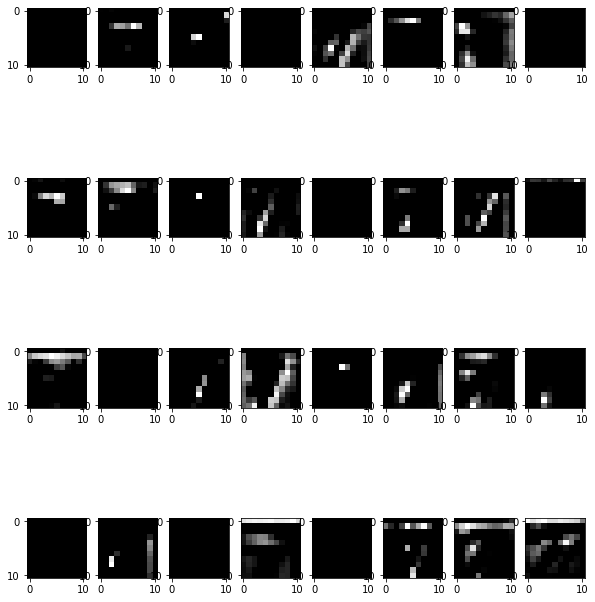


Label: 1
Layer 0:




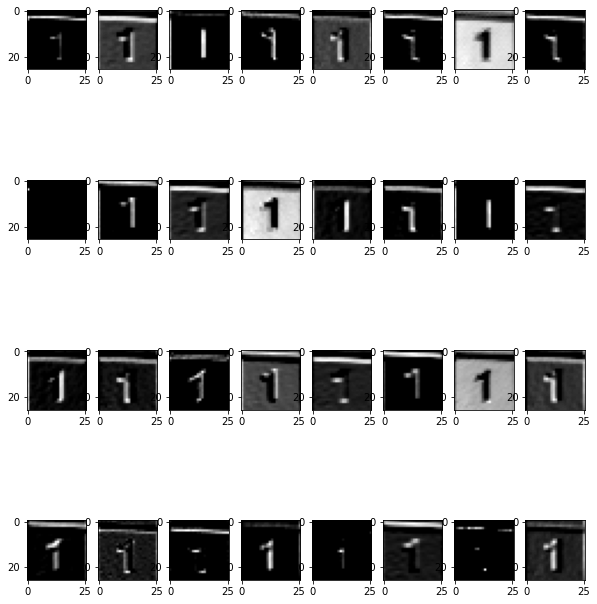

Layer 1:




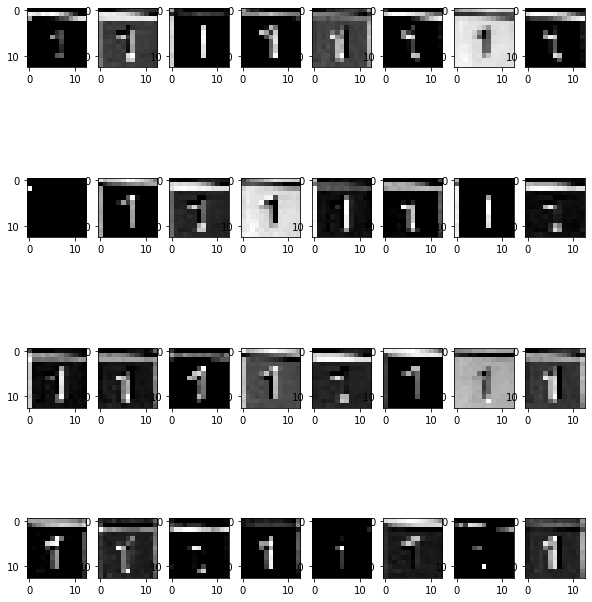

Layer 2:




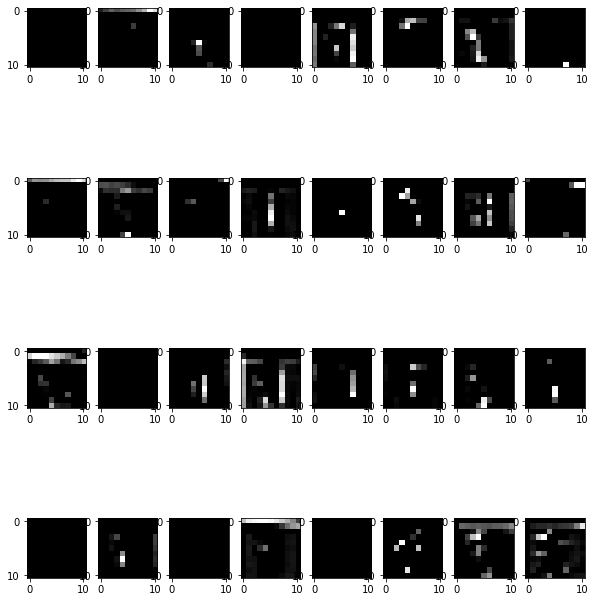

In [12]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
for i in range(10):
    activations = activation_model.predict(X_Train[i].reshape(1,28,28,1))
    print("\nLabel: "+str(np.argmax(Y_Train[i])))
    for i in range(3):
        print("Layer "+str(i)+":\n\n")
        display_activation(activations, 8, 4, i)
        plt.show()